In [59]:
import random

from wbtools.lib.nlp.text_preprocessing import get_documents_from_text
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import random


In [82]:
max_num_clusters = 100
max_corpus_length = 100000

In [83]:
sent_expr_pattern = [sentence for line in open("../extracted_sentences/sentences_exp_subcellloc.txt") for sentence in get_documents_from_text(text=line.strip(), split_sentences=True) if len(sentence) > 20]
sent_expr_pattern[0:10]

['cell bodies and axons',
 'GFP expressed on the pseudocoelomic face of body wall muscles, but not on their hypodermal face.',
 'GFP expressed on the pseudocoelomic face of body wall muscles, but not on their hypodermal face.',
 'cytoplasm of the body wall muscle',
 'Overall, OOC-3 is localized to a membrane compartment that had a dynamic distribution through the cell cycle.',
 'From fertilization until the beginning of pronuclear migration OOC-3 is uniformly enriched at the cortex of P0 in 75% of the embryos (n=36).',
 'At the beginning of pronuclear migration the cortical staining diminishes and OOC-3 is enriched around pronuclei (n=10).',
 'During rotation in P0, OOC-3 redistributes to the asters and in mitosis OOC-3 becomes enriched at the mitotic spindle.',
 'Towards the beginning of prophase of two-cell stage embryos OOC-3 localizes to a reticular structure spanning the whole cytoplasm, being enriched at the circumference of nuclei.',
 'In mitosis it again localizes to the mitoti

In [84]:
sent_expr_pattern_clean = list(set([sent.strip(' ').strip('.;,/-|') for sent in sent_expr_pattern]))
sent_expr_pattern_clean[0:10]

['In addition, (YFP)-fused MACO- 1 and the rER marker translocating-chain associating membrane protein (CFP::TRAM) colocalized in the rER',
 'Membrane localization of LET-60 is readily observable in the rectangular immature oocytes at the gonad loop region',
 'Localization of HPK-1:: GFP protein is most concentrated in the nucleus often within distinct sub-nuclear sites',
 'Inactivation of cyk-4 by RNA interference (RNAi) indicated that staining was specific and RNAi effective',
 'In zygotes, cytoplasmic GFP::MEG-3 formed an anterior-to-posterior gradient with highest levels in the posterior',
 'TLK-1 was localized to the nucleus during interphase and prophase and appeared to be mostly excluded from DNA in prophase',
 'By the twofold embryonic stage, GFP::CED-11 had a more restricted pattern inside the cell and also could be seen on the plasma membrane',
 'During late anaphase and telophase, GPR-1/2 were once again enriched at the posterior part of the P1 cell',
 'In 1.5-2-fold embryos

In [85]:
corpus = sent_expr_pattern_clean
random.shuffle(corpus)
corpus = corpus[0:max_corpus_length]
len(corpus)

6583

In [86]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')
corpus_embeddings = embedder.encode(corpus)

In [87]:
tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, learning_rate = 1000, n_iter = 1500)
twodembeddings = tsne.fit_transform(corpus_embeddings)

/home/valerio/workspace/caltech/sentence_classification/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


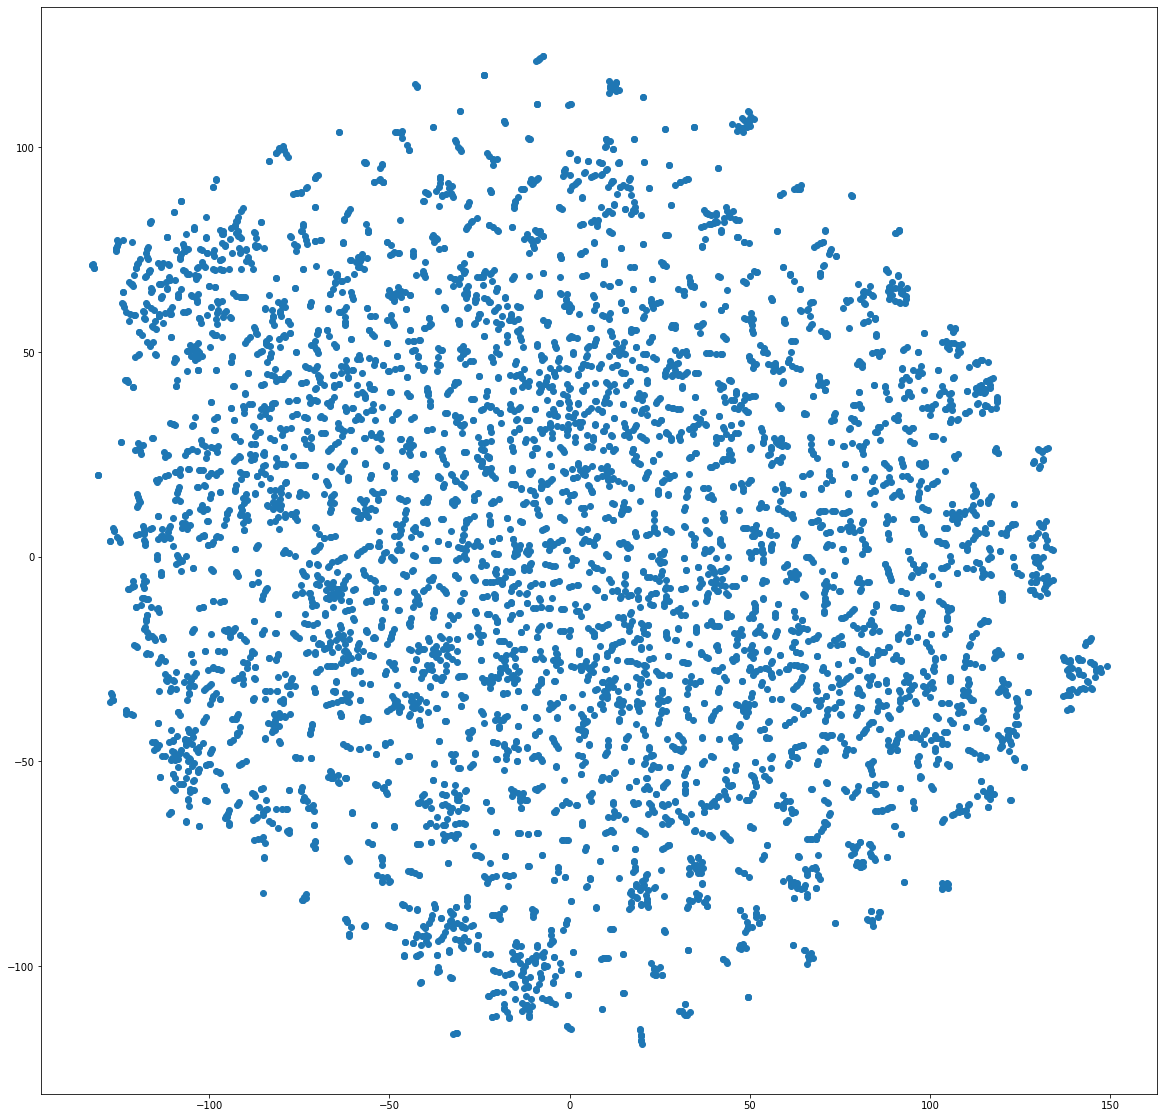

In [91]:
fig_scatter = plt.figure(figsize=(20, 20))
plt.scatter(x=list(twodembeddings[:,0]), y=list(twodembeddings[:,1]))

In [51]:
distorsions = []
sil = []
sil_samples = []
for k in range(2, max_num_clusters):
    clustering_model = KMeans(n_clusters=k)
    clustering_model.fit(corpus_embeddings)
    distorsions.append(clustering_model.inertia_)
    sil.append(silhouette_score(corpus_embeddings, clustering_model.labels_, metric='euclidean'))


Text(0.5, 1.0, 'Elbow curve')

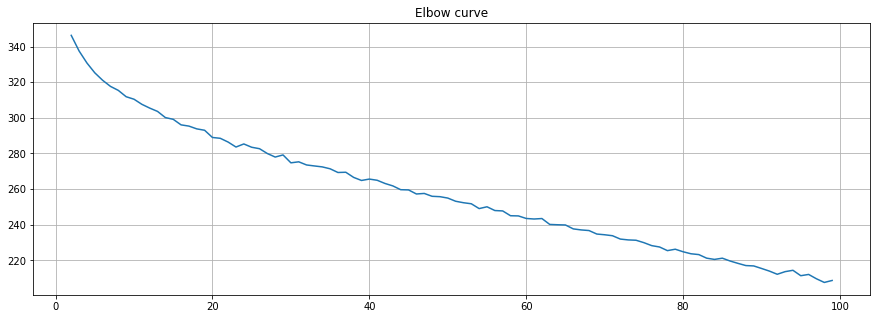

In [52]:
fig_elbow = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_num_clusters), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Silhouette curve')

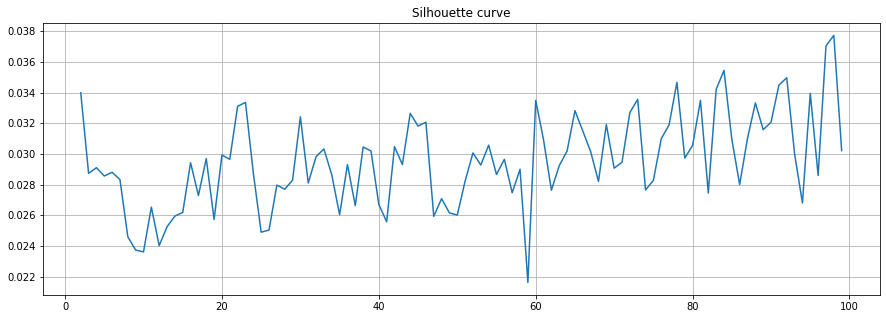

In [53]:
fig_sil = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_num_clusters), sil)
plt.grid(True)
plt.title('Silhouette curve')

In [54]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

/home/valerio/workspace/caltech/sentence_classification/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


TypeError: scatter() missing 1 required positional argument: 'y'

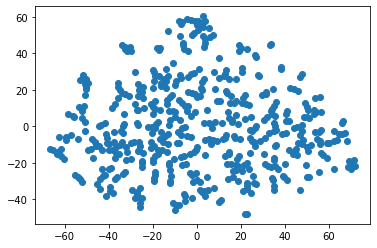